In [111]:
# only lower case for now pls
import numpy as np
import matplotlib.pyplot as plt

def namefilter(name):
    
    '''
    translate lowercase letter to zernike index
    the index corresponds to the letter in alphabetical order
    
    e.g.
    
    a = Z1
    b = Z2
    .
    .
    .
    z = Z26
    
    you get it, have fun
    '''
    
    n2z = []
    
    for nind in range(len(name)):
        if name[nind] == 'a':
            n2z.append(1)
        elif name[nind] == 'b':
            n2z.append(2)
        elif name[nind] == 'c':
            n2z.append(3)
        elif name[nind] == 'd':
            n2z.append(4)
        elif name[nind] == 'e':
            n2z.append(5)
        elif name[nind] == 'f':
            n2z.append(6)
        elif name[nind] == 'g':
            n2z.append(7)
        elif name[nind] == 'h':
            n2z.append(8)
        elif name[nind] == 'i':
            n2z.append(9)
        elif name[nind] == 'j':
            n2z.append(10)
        elif name[nind] == 'k':
            n2z.append(11)
        elif name[nind] == 'l':
            n2z.append(12)
        elif name[nind] == 'm':
            n2z.append(13)
        elif name[nind] == 'n':
            n2z.append(14)
        elif name[nind] == 'o':
            n2z.append(15)
        elif name[nind] == 'p':
            n2z.append(16)
        elif name[nind] == 'q':
            n2z.append(17)
        elif name[nind] == 'r':
            n2z.append(18)
        elif name[nind] == 's':
            n2z.append(19)
        elif name[nind] == 't':
            n2z.append(20)
        elif name[nind] == 'u':
            n2z.append(21)
        elif name[nind] == 'v':
            n2z.append(22)
        elif name[nind] == 'w':
            n2z.append(23)
        elif name[nind] == 'x':
            n2z.append(24)
        elif name[nind] == 'y':
            n2z.append(25)
        elif name[nind] == 'z':
            n2z.append(26)
        else:
            print('a space! Or unrecognizeable character')
            
    return n2z

# Stolen from AOtools https://aotools.readthedocs.io/en/v1.0/_modules/aotools/functions/zernike.html
def zernIndex(j):
    """
    Find the [n,m] list giving the radial order n and azimuthal order
    of the Zernike polynomial of Noll index j.

    Parameters:
        j (int): The Noll index for Zernike polynomials

    Returns:
        list: n, m values
    """
    n = int((-1.+np.sqrt(8*(j-1)+1))/2.)
    p = (j-(n*(n+1))/2.)
    k = n%2
    m = int((p+k)/2.)*2 - k

    if m!=0:
        if j%2==0:
            s=1
        else:
            s=-1
        m *= s

    return [n, m]

def zernike(n, m, N):
    """
     Creates the Zernike polynomial with radial index, n, and azimuthal index, m.
     Args:
        n (int): The radial order of the zernike mode
        m (int): The azimuthal order of the zernike mode
        N (int): The diameter of the zernike more in pixels
     Returns:
        ndarray: The Zernike mode
     """
    import numpy
    coords = (numpy.arange(N) - N / 2. + 0.5) / (N / 2.)
    X, Y = numpy.meshgrid(coords, coords)
    R = numpy.sqrt(X**2 + Y**2)
    theta = numpy.arctan2(Y, X)

    if m==0:
        Z = numpy.sqrt(n+1)*zernikeRadialFunc(n, 0, R)
    else:
        if m > 0: # j is even
            Z = numpy.sqrt(2*(n+1)) * zernikeRadialFunc(n, m, R) * numpy.cos(m*theta)
        else:   #i is odd
            m = abs(m)
            Z = numpy.sqrt(2*(n+1)) * zernikeRadialFunc(n, m, R) * numpy.sin(m * theta)

    # clip
    Z = Z*numpy.less_equal(R, 1.0)

    return Z

def zernikeRadialFunc(n, m, r):
    """
    Fucntion to calculate the Zernike radial function
    Parameters:
        n (int): Zernike radial order
        m (int): Zernike azimuthal order
        r (ndarray): 2-d array of radii from the centre the array
    Returns:
        ndarray: The Zernike radial function
    """
    import numpy
    R = numpy.zeros(r.shape)
    for i in range(0, int((n - m) / 2) + 1):

        R += numpy.array(r**(n - 2 * i) * (((-1)**(i)) *
                         numpy.math.factorial(n - i)) /
                         (numpy.math.factorial(i) *
                          numpy.math.factorial(int(0.5 * (n + m) - i)) *
                          numpy.math.factorial(int(0.5 * (n - m) - i))),
                         dtype='float')
    return R


# wraps the phase in pi steps 
def PhaseWrap(array):
    
    for xind in range(len(array[0,:])):
        for yind in range(len(array[0,:])):
            
            array[xind,yind] = (array[xind,yind]%(np.pi))
            
    return array

# the "user interface"
def name2zernike(name):
    
    zind_list = namefilter(name)
    zern_arry = np.zeros([512,512])
    
    for zind in range(len(zind_list)):
        
        n,m = zernIndex(zind_list[zind])
        zern_arry += zernike(n,m,512)
    
    zern_arry = PhaseWrap(zern_arry)
    
    return zern_arry


            
    
    

a space! Or unrecognizeable character


<function matplotlib.pyplot.show(*args, **kw)>

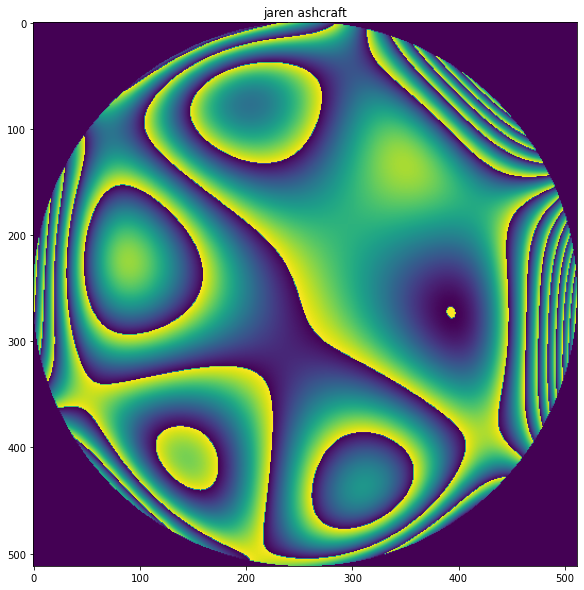

In [112]:
# only lower case can be filtered
name = 'jaren ashcraft'

plt.figure(figsize=[10,10])
plt.imshow(name2zernike(name))
plt.title(name)
plt.show